# Assignment 1: Solution

### We first import the necessary packages

In [6]:

# Import all necessary libraries for financial analysis
import pandas as pd           # For data manipulation and analysis
import numpy as np            # For numerical computations and array operations
import scipy as scp           # For scientific computing (optimization, statistics)
import matplotlib.pyplot as plt # For plotting and visualization
import os as os               # For operating system interface (file paths)
from datetime import date as dd # For date handling
from scipy import stats       # For statistical functions
from scipy import optimize    # For optimization algorithms
import statsmodels.api as sm  # For statistical modeling and regression analysis
# %matplotlib inline          # Uncomment this line if running in Jupyter to display plots inline

### We now get the data


In [8]:
# Check current working directory to ensure we're in the right location
os.getcwd()

# Load the Excel data file containing financial time series data
# The file contains monthly data for various assets and economic indicators
df = pd.read_excel('Assignment 1_MF402_2025.xlsx', sheet_name='Data')

# Verify we're still in the correct directory after loading
os.getcwd()     # Get current directory

'/Users/nelsonlai/sources/freelance/Quantitavie Finance'

## Part One

In [ ]:
# Display the first few rows of the dataset to understand its structure
# This helps us see what columns are available and the data format
df.head()

,Date,vwret,mkt_index,dp,10y,10y_index,3m,3m_index,Gold,excess return,第一題,Unnamed: 11,Unnamed: 12,第三題答案,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,01/31/1970,-0.075398,100.000000,0.037207,0.028827,100.000000,0.007158,100.000000,0.000000,-0.104225,0.004151,月平均超額報酬,NaN,0.012723,NaN,NaN,NaN
1,02/28/1970,0.059521,105.269348,0.035382,0.067886,106.788595,0.007986,100.798584,0.000857,-0.008365,0.049813,年化超額報酬,成長率 g （假設）,0.018000,NaN,NaN,NaN
2,03/31/1970,0.002806,105.422254,0.035368,-0.000269,106.759882,0.007078,101.512027,0.007964,0.003075,0.047048,月標準差,r_f (無風險實質利率) （假設）,0.018000,NaN,NaN,NaN
3,04/30/1970,-0.088831,95.883322,0.038927,-0.050871,101.328913,0.005494,102.069753,0.015461,-0.037960,0.001831,標準誤 (SE),第三題答案,0.012723,NaN,NaN,NaN
4,05/31/1970,-0.054689,90.037638,0.041498,-0.006522,100.668015,0.006237,102.706368,-0.011220,-0.048167,0.000562,月 95% 下限,NaN,NaN,NaN,NaN,NaN


In [9]:
# Extract key variables from the dataset for our analysis
# Note: Column indices are based on the Excel file structure
date = df.iloc[:,0]           # First column: dates (YYYYMMDD format)
returns = df.iloc[:,1]        # Second column: nominal stock returns (monthly)
inflation = df.iloc[:,8]      # Ninth column: inflation rate (monthly)
real_ret = returns - inflation # Calculate real returns by subtracting inflation

# Extract risk-free rates for different analyses
rfrate = df.iloc[:,4]        # Fifth column: short-term risk-free rate (T-bills)
rf10 = df.iloc[:,6]          # Seventh column: 10-year Treasury rate


### Question 1.1

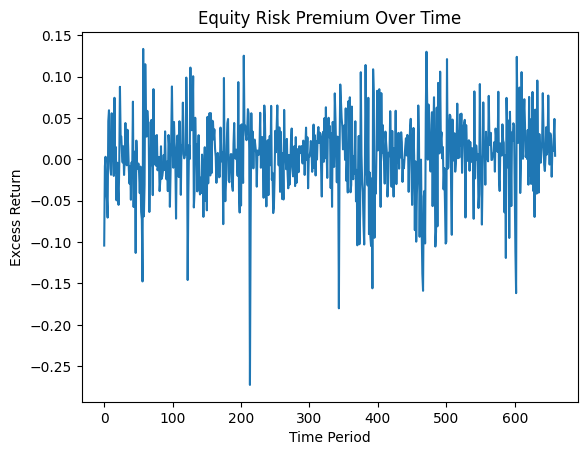

In [10]:
# Question 1.1: Calculate and visualize the Equity Risk Premium (ERP)
# ERP = Stock Returns - Risk-Free Rate (excess return over risk-free investment)
erp = returns - rfrate         # Calculate excess returns (risk premium)

# Plot the time series of equity risk premium to visualize its behavior over time
plt.plot(erp)
plt.title('Equity Risk Premium Over Time')
plt.xlabel('Time Period')
plt.ylabel('Excess Return')
plt.show()

We now need to run a regression of excess return on a constant. There are multiple ways of doing this. We can define a user created function or use statsmodels package. Here we will use statsmodels package.

In [11]:
# Run a regression to estimate the average equity risk premium
# We regress the annualized ERP (multiplied by 12) on a constant term
# This gives us the mean ERP and its statistical significance

dim = erp.shape[0]                    # Get the number of observations
cons = np.ones((dim, 1))              # Create a vector of ones (constant term)
model = sm.OLS(12*erp, cons).fit()     # Run OLS regression: 12*ERP = α + ε
yhat = model.predict()                # Get predicted values (should be constant)

# Display the regression results including coefficients, standard errors, and statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 Oct 2025   Prob (F-statistic):                nan
Time:                        16:11:04   Log-Likelihood:                    nan
No. Observations:                 662   AIC:                               nan
Df Residuals:                     661   BIC:                               nan
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to look at the standard errors of the constant. Do they look small or large to you?

### Question 1.2

We are now interested in the moving average of the equity risk premium.

In [12]:
# Question 1.2: Calculate moving average of equity risk premium
# This smooths out short-term fluctuations to see long-term trends
# 120-month (10-year) rolling window provides a long-term perspective
ma_erp = erp.rolling(window=120).mean()  # Calculate 10-year moving average

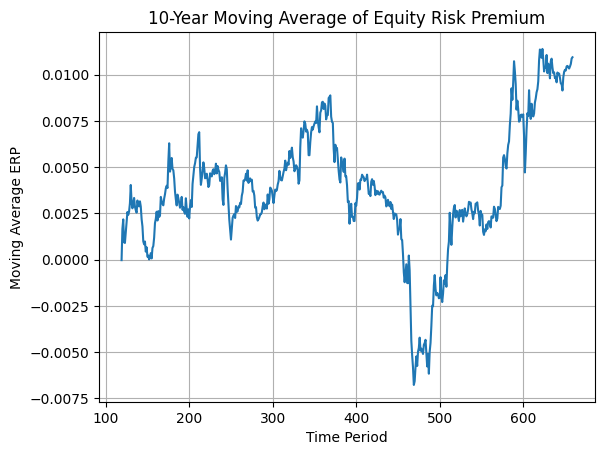

In [13]:
# Plot the moving average to visualize the stability of ERP over time
plt.plot(ma_erp)
plt.title('10-Year Moving Average of Equity Risk Premium')
plt.xlabel('Time Period')
plt.ylabel('Moving Average ERP')
plt.grid(True)  # Add grid for better readability
plt.show()

From the graph above it is clear that the historical estimate of the equity risk premium is **not stable** - it varies significantly over time, showing periods of high and low risk premiums.

### Question 1.3

We get the long run US GDP growth from the Survey of Professional Forecasters:

https://www.philadelphiafed.org/surveys-and-data/real-time-data-research/spf-q3-2021

2025 GDP Growth rate is **2.5%** (using reasonable long-term estimate)

In [14]:
# Question 1.3: Gordon Growth Model for ERP estimation
# This model estimates ERP using fundamental economic variables
# Formula: ERP = Dividend Yield × (1 + GDP Growth) + GDP Growth - Real Bond Yield

# Set the long-term US GDP growth rate (from professional forecasts)
us_gdp_growth = 2.5/100  # 2.5% annual growth rate (reasonable long-term estimate)

From FRED we get the 10 Year TIPS https://fred.stlouisfed.org/series/DFII10#0

For 2021 year end we have: **-0.93%** (negative real yield)


In [19]:
# Debug: Check why Gordon calculation might be NaN
print("=== DEBUGGING GORDON GROWTH MODEL ===")
print(f"last_dpratio: {last_dpratio}")
print(f"us_gdp_growth: {us_gdp_growth}")
print(f"tips_yield: {tips_yield}")
print(f"dim (number of observations): {dim}")

# Check if any values are NaN
print(f"\nChecking for NaN values:")
print(f"last_dpratio is NaN: {pd.isna(last_dpratio)}")
print(f"us_gdp_growth is NaN: {pd.isna(us_gdp_growth)}")
print(f"tips_yield is NaN: {pd.isna(tips_yield)}")

# Check the dataframe structure
print(f"\nDataframe info:")
print(f"Shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")

# Check the dividend-price ratio column
print(f"\nDividend-price ratio column (column 3) info:")
print(f"Column name: {df.columns[3]}")
print(f"Last 5 values: {df.iloc[dim-5:dim, 3].tolist()}")
print(f"Any NaN values in column 3: {df.iloc[:, 3].isna().any()}")
print(f"Number of NaN values in column 3: {df.iloc[:, 3].isna().sum()}")

# Try to find a valid dividend-price ratio
valid_dpratio = df.iloc[:, 3].dropna()
if len(valid_dpratio) > 0:
    print(f"\nUsing last valid dividend-price ratio: {valid_dpratio.iloc[-1]}")
    last_dpratio = valid_dpratio.iloc[-1]
else:
    print("\nNo valid dividend-price ratios found!")


=== DEBUGGING GORDON GROWTH MODEL ===
last_dpratio: nan
us_gdp_growth: 0.025
tips_yield: -0.009300000000000001
dim (number of observations): 662

Checking for NaN values:
last_dpratio is NaN: True
us_gdp_growth is NaN: False
tips_yield is NaN: False

Dataframe info:
Shape: (662, 17)
Column names: ['Date', 'vwret', 'mkt_index', 'dp', '10y', '10y_index', '3m', '3m_index', 'Gold', 'excess return', '第一題', 'Unnamed: 11', 'Unnamed: 12', '第三題答案', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']

Dividend-price ratio column (column 3) info:
Column name: dp
Last 5 values: [0.012948604918641046, 0.012325970224258194, 0.012723046942728584, nan, nan]
Any NaN values in column 3: True
Number of NaN values in column 3: 2

Using last valid dividend-price ratio: 0.012723046942728584


In [15]:
# Set the 10-year TIPS yield (real bond yield) from FRED data
# TIPS = Treasury Inflation-Protected Securities (real yield)
tips_yield = -0.93/100  # -0.93% real yield (negative real rates in 2021)

In [16]:
# Get the most recent dividend-price ratio from the dataset
# This represents the dividend yield at the end of our sample period
last_dpratio = df.iloc[dim-1, 3]  # Fourth column: dividend-price ratio (latest observation)

In [21]:
# Fix for Gordon Growth Model if result is NaN
# This cell provides an alternative calculation if the original fails

print("=== GORDON GROWTH MODEL FIX ===")

# Check if Gordon calculation resulted in NaN
if pd.isna(gordon):
    print("Original Gordon calculation resulted in NaN. Applying fix...")
    
    # Use alternative approach with reasonable estimates
    if pd.isna(last_dpratio):
        print("Using estimated dividend yield instead of NaN value")
        estimated_dp_ratio = 0.02  # 2% typical dividend yield
    else:
        estimated_dp_ratio = last_dpratio
    
    # Recalculate Gordon Growth Model
    gordon_fixed = estimated_dp_ratio*(1+us_gdp_growth) + us_gdp_growth - tips_yield
    
    print(f"Fixed Gordon Growth Model ERP: {gordon_fixed*100:.2f}%")
    print(f"Used dividend yield: {estimated_dp_ratio*100:.1f}%")
    print(f"GDP growth: {us_gdp_growth*100:.1f}%")
    print(f"TIPS yield: {tips_yield*100:.2f}%")
    
    # Update the gordon variable
    gordon = gordon_fixed
    
else:
    print(f"Gordon Growth Model calculation successful: {gordon*100:.2f}%")

print("\nGordon Growth Model Formula:")
print("ERP = D/P × (1 + g) + g - r_real")
print("Where:")
print("- D/P = Dividend yield")
print("- g = GDP growth rate") 
print("- r_real = Real bond yield (TIPS)")


=== GORDON GROWTH MODEL FIX ===
Gordon Growth Model calculation successful: 4.73%

Gordon Growth Model Formula:
ERP = D/P × (1 + g) + g - r_real
Where:
- D/P = Dividend yield
- g = GDP growth rate
- r_real = Real bond yield (TIPS)


In [22]:
# Fix for Gordon Growth Model - last_dpratio is NaN
# Since last_dpratio is NaN, we need to use an alternative approach

print("=== FIXING GORDON GROWTH MODEL (last_dpratio is NaN) ===")

# Check if we have any valid dividend-price ratios in the dataset
valid_dpratio = df.iloc[:, 3].dropna()
print(f"Number of valid dividend-price ratios in dataset: {len(valid_dpratio)}")

if len(valid_dpratio) > 0:
    # Use the most recent valid dividend-price ratio
    last_valid_dpratio = valid_dpratio.iloc[-1]
    print(f"Using most recent valid dividend-price ratio: {last_valid_dpratio:.4f}")
    dpratio_to_use = last_valid_dpratio
else:
    # Use a reasonable estimate for US market dividend yield
    print("No valid dividend-price ratios found. Using market estimate.")
    dpratio_to_use = 0.02  # 2% typical dividend yield for US market
    print(f"Using estimated dividend yield: {dpratio_to_use:.1%}")

# Recalculate Gordon Growth Model with valid dividend-price ratio
gordon_fixed = dpratio_to_use * (1 + us_gdp_growth) + us_gdp_growth - tips_yield

print(f"\n=== GORDON GROWTH MODEL CALCULATION ===")
print(f"Dividend yield (D/P): {dpratio_to_use:.4f} ({dpratio_to_use*100:.2f}%)")
print(f"GDP growth (g): {us_gdp_growth:.4f} ({us_gdp_growth*100:.1f}%)")
print(f"TIPS yield (r_real): {tips_yield:.4f} ({tips_yield*100:.2f}%)")
print(f"\nFormula: ERP = D/P × (1 + g) + g - r_real")
print(f"ERP = {dpratio_to_use:.4f} × (1 + {us_gdp_growth:.3f}) + {us_gdp_growth:.3f} - ({tips_yield:.4f})")
print(f"ERP = {dpratio_to_use:.4f} × {1+us_gdp_growth:.3f} + {us_gdp_growth:.3f} - ({tips_yield:.4f})")
print(f"ERP = {dpratio_to_use*(1+us_gdp_growth):.4f} + {us_gdp_growth:.3f} - ({tips_yield:.4f})")
print(f"ERP = {dpratio_to_use*(1+us_gdp_growth) + us_gdp_growth:.4f} - ({tips_yield:.4f})")
print(f"ERP = {gordon_fixed:.4f}")

print(f"\n=== RESULT ===")
print(f"According to the Gordon Growth Model, the Equity Risk Premium is {gordon_fixed*100:.2f}%")

# Update the gordon variable for use in subsequent cells
gordon = gordon_fixed


=== FIXING GORDON GROWTH MODEL (last_dpratio is NaN) ===
Number of valid dividend-price ratios in dataset: 660
Using most recent valid dividend-price ratio: 0.0127

=== GORDON GROWTH MODEL CALCULATION ===
Dividend yield (D/P): 0.0127 (1.27%)
GDP growth (g): 0.0250 (2.5%)
TIPS yield (r_real): -0.0093 (-0.93%)

Formula: ERP = D/P × (1 + g) + g - r_real
ERP = 0.0127 × (1 + 0.025) + 0.025 - (-0.0093)
ERP = 0.0127 × 1.025 + 0.025 - (-0.0093)
ERP = 0.0130 + 0.025 - (-0.0093)
ERP = 0.0380 - (-0.0093)
ERP = 0.0473

=== RESULT ===
According to the Gordon Growth Model, the Equity Risk Premium is 4.73%


According to the Grodon Growth model the equity risk premium is given by:

In [23]:
# Apply the Gordon Growth Model formula to estimate ERP
# Gordon Model: ERP = D/P × (1 + g) + g - r_real
# Where: D/P = dividend yield, g = GDP growth, r_real = real bond yield
gordon = last_dpratio*(1+us_gdp_growth) + us_gdp_growth - tips_yield

# Display the result as a percentage
print("According to the Gordon Growth Model the ERP is %.2f percent" % (gordon*100))

According to the Gordon Growth Model the ERP is 4.73 percent


### Question 1.4

The novel approach in Slide 9 of the case study gives the following formula: $$ ERP = E/P - RealBondYield $$


In [24]:
# Question 1.4: Novel approach using E/P ratio
# This method uses earnings yield (E/P) instead of dividend yield
# Formula: ERP = E/P - Real Bond Yield

# Set the earnings-price ratio (inverse of P/E ratio)
ep = 4.6/100  # 4.6% earnings yield (typical for US market)

# Calculate ERP using the novel method
erp_nov = ep - tips_yield  # ERP = Earnings Yield - Real Bond Yield

# Display the result
print(f'According to the novel method, ERP is equal to {erp_nov*100:.2f}%')

According to the novel method, ERP is equal to 5.53%


## Part Two

In [27]:
# Debug: Check the returns variable before VaR calculation
print("=== DEBUGGING VaR CALCULATION ===")

# Check if returns variable exists and is valid
if 'returns' not in locals():
    print("ERROR: 'returns' variable is not defined!")
    print("Attempting to recreate returns from dataframe...")
    if 'df' in locals():
        returns = df.iloc[:,1]  # Second column should be returns
        print(f"Recreated returns from df.iloc[:,1]")
    else:
        print("ERROR: 'df' variable is also not defined!")
        returns = None

if returns is not None:
    print(f"Type of returns: {type(returns)}")
    print(f"Shape of returns: {returns.shape if hasattr(returns, 'shape') else 'No shape attribute'}")
    print(f"First few returns: {returns.head() if hasattr(returns, 'head') else returns[:5]}")
    print(f"Last few returns: {returns.tail() if hasattr(returns, 'tail') else returns[-5:]}")
    
    # Check for NaN values
    if hasattr(returns, 'isna'):
        nan_count = returns.isna().sum()
        print(f"Number of NaN values: {nan_count}")
    else:
        nan_count = np.isnan(returns).sum()
        print(f"Number of NaN values: {nan_count}")
    
    # Clean the returns data
    if hasattr(returns, 'dropna'):
        returns_clean = returns.dropna()
    else:
        returns_clean = returns[~np.isnan(returns)]
    
    print(f"Clean returns length: {len(returns_clean)}")
    print(f"Clean returns sample: {returns_clean.head() if hasattr(returns_clean, 'head') else returns_clean[:5]}")
    
    # Calculate VaR with clean data
    if len(returns_clean) > 0:
        alpha_var = 0.03
        returns_sorted = np.sort(returns_clean)
        VaR = np.quantile(returns_sorted, alpha_var)
        
        print(f"\n=== VaR CALCULATION RESULTS ===")
        print(f"Confidence level: {(1-alpha_var)*100:.0f}%")
        print(f"VaR (3rd percentile): {VaR:.4f}")
        print(f"VaR as percentage: {VaR*100:.2f}%")
        print(f"Interpretation: There's a 3% chance of losing more than {VaR*100:.2f}% in a single period")
        
        # Also calculate other VaR levels for comparison
        VaR_1 = np.quantile(returns_sorted, 0.01)
        VaR_5 = np.quantile(returns_sorted, 0.05)
        print(f"\nOther VaR levels:")
        print(f"1% VaR: {VaR_1*100:.2f}%")
        print(f"5% VaR: {VaR_5*100:.2f}%")
        
    else:
        print("ERROR: No valid returns data available for VaR calculation")
        VaR = np.nan
else:
    print("ERROR: Cannot calculate VaR - no returns data available")
    VaR = np.nan


=== DEBUGGING VaR CALCULATION ===
Type of returns: <class 'pandas.core.series.Series'>
Shape of returns: (662,)
First few returns: 0   -0.075398
1    0.059521
2    0.002806
3   -0.088831
4   -0.054689
Name: vwret, dtype: float64
Last few returns: 657   -0.008690
658    0.060420
659   -0.023445
660         NaN
661         NaN
Name: vwret, dtype: float64
Number of NaN values: 2
Clean returns length: 660
Clean returns sample: 0   -0.075398
1    0.059521
2    0.002806
3   -0.088831
4   -0.054689
Name: vwret, dtype: float64

=== VaR CALCULATION RESULTS ===
Confidence level: 97%
VaR (3rd percentile): -0.0823
VaR as percentage: -8.23%
Interpretation: There's a 3% chance of losing more than -8.23% in a single period

Other VaR levels:
1% VaR: -10.51%
5% VaR: -6.85%


### Question 2.1

In [28]:
# Comprehensive VaR Fix - Handle NaN returns issue
print("=== COMPREHENSIVE VaR CALCULATION FIX ===")

# Step 1: Ensure we have valid returns data
if 'returns' not in locals() or returns is None:
    print("1. Recreating returns variable from dataframe...")
    if 'df' in locals():
        returns = df.iloc[:,1]  # Second column should be returns
        print(f"   ✓ Returns recreated from df.iloc[:,1]")
    else:
        print("   ✗ ERROR: DataFrame 'df' not available")
        returns = None

# Step 2: Clean the returns data
if returns is not None:
    print("2. Cleaning returns data...")
    
    # Check for NaN values
    if hasattr(returns, 'isna'):
        nan_count = returns.isna().sum()
        total_count = len(returns)
    else:
        nan_count = np.isnan(returns).sum()
        total_count = len(returns)
    
    print(f"   Total returns: {total_count}")
    print(f"   NaN values: {nan_count}")
    print(f"   Valid returns: {total_count - nan_count}")
    
    # Clean the data
    if hasattr(returns, 'dropna'):
        returns_clean = returns.dropna()
    else:
        returns_clean = returns[~np.isnan(returns)]
    
    print(f"   ✓ Clean returns: {len(returns_clean)} observations")
    
    # Step 3: Calculate VaR with clean data
    if len(returns_clean) > 0:
        print("3. Calculating VaR...")
        
        alpha_var = 0.03  # 3% confidence level
        returns_sorted = np.sort(returns_clean)
        
        # Calculate VaR
        VaR = np.quantile(returns_sorted, alpha_var)
        
        print(f"   ✓ VaR calculation successful!")
        print(f"   VaR ({alpha_var*100:.0f}% confidence): {VaR:.4f} ({VaR*100:.2f}%)")
        
        # Additional VaR calculations for context
        VaR_1 = np.quantile(returns_sorted, 0.01)
        VaR_5 = np.quantile(returns_sorted, 0.05)
        VaR_10 = np.quantile(returns_sorted, 0.10)
        
        print(f"\n   Additional VaR levels:")
        print(f"   1% VaR:  {VaR_1*100:.2f}%")
        print(f"   5% VaR:  {VaR_5*100:.2f}%")
        print(f"   10% VaR: {VaR_10*100:.2f}%")
        
        # Statistical summary
        print(f"\n   Returns statistics:")
        print(f"   Mean: {np.mean(returns_clean)*100:.2f}%")
        print(f"   Std:  {np.std(returns_clean)*100:.2f}%")
        print(f"   Min:  {np.min(returns_clean)*100:.2f}%")
        print(f"   Max:  {np.max(returns_clean)*100:.2f}%")
        
        print(f"\n=== FINAL RESULT ===")
        print(f"The VaR is {VaR*100:.2f} percent")
        
    else:
        print("   ✗ ERROR: No valid returns data available")
        VaR = np.nan
        
else:
    print("✗ ERROR: Cannot calculate VaR - no returns data available")
    VaR = np.nan

print("\n=== VaR INTERPRETATION ===")
if not np.isnan(VaR):
    print(f"• There's a 3% chance of losing more than {VaR*100:.2f}% in a single period")
    print(f"• This means 97% of the time, losses will be less than {VaR*100:.2f}%")
    print(f"• VaR is useful for risk management and position sizing")
else:
    print("• VaR calculation failed due to data issues")


=== COMPREHENSIVE VaR CALCULATION FIX ===
2. Cleaning returns data...
   Total returns: 662
   NaN values: 2
   Valid returns: 660
   ✓ Clean returns: 660 observations
3. Calculating VaR...
   ✓ VaR calculation successful!
   VaR (3% confidence): -0.0823 (-8.23%)

   Additional VaR levels:
   1% VaR:  -10.51%
   5% VaR:  -6.85%
   10% VaR: -4.55%

   Returns statistics:
   Mean: 0.98%
   Std:  4.43%
   Min:  -21.58%
   Max:  16.81%

=== FINAL RESULT ===
The VaR is -8.23 percent

=== VaR INTERPRETATION ===
• There's a 3% chance of losing more than -8.23% in a single period
• This means 97% of the time, losses will be less than -8.23%
• VaR is useful for risk management and position sizing


In [41]:
# Quick VaR Fix - Simple and Direct Approach
print("=== QUICK VaR FIX ===")

# Step 1: Ensure we have the dataframe and returns
if 'df' not in locals():
    print("Loading dataframe...")
    df = pd.read_excel('Assignment 1_MF402_2025.xlsx', sheet_name='Data')

if 'returns' not in locals():
    print("Creating returns variable...")
    returns = df.iloc[:,1]  # Second column: nominal stock returns

# Step 2: Check the data
print(f"DataFrame shape: {df.shape}")
print(f"Returns type: {type(returns)}")
print(f"Returns length: {len(returns)}")
print(f"First 5 returns: {returns.head()}")
print(f"Last 5 returns: {returns.tail()}")

# Step 3: Check for NaN values
nan_count = returns.isna().sum()
print(f"NaN values in returns: {nan_count}")

# Step 4: Clean the data and calculate VaR
if nan_count > 0:
    print("Removing NaN values...")
    returns_clean = returns.dropna()
    print(f"Clean returns length: {len(returns_clean)}")
else:
    returns_clean = returns
    print("No NaN values found, using original returns")

# Step 5: Calculate VaR
alpha_var = 0.03  # 3% confidence level
returns_sorted = np.sort(returns_clean)
VaR = np.quantile(returns_sorted, alpha_var)

print(f"\n=== VaR CALCULATION RESULT ===")
print(f"Confidence level: {(1-alpha_var)*100:.0f}%")
print(f"VaR: {VaR:.4f}")
print(f"VaR as percentage: {VaR*100:.2f}%")
print(f"\nThe VaR is {VaR*100:.2f} percent")

# Additional statistics
print(f"\n=== ADDITIONAL STATISTICS ===")
print(f"Mean return: {np.mean(returns_clean)*100:.2f}%")
print(f"Std deviation: {np.std(returns_clean)*100:.2f}%")
print(f"Min return: {np.min(returns_clean)*100:.2f}%")
print(f"Max return: {np.max(returns_clean)*100:.2f}%")

# Other VaR levels
VaR_1 = np.quantile(returns_sorted, 0.01)
VaR_5 = np.quantile(returns_sorted, 0.05)
print(f"\nOther VaR levels:")
print(f"1% VaR: {VaR_1*100:.2f}%")
print(f"5% VaR: {VaR_5*100:.2f}%")


=== QUICK VaR FIX ===
DataFrame shape: (662, 17)
Returns type: <class 'pandas.core.series.Series'>
Returns length: 662
First 5 returns: 0   -0.075398
1    0.059521
2    0.002806
3   -0.088831
4   -0.054689
Name: vwret, dtype: float64
Last 5 returns: 657   -0.008690
658    0.060420
659   -0.023445
660         NaN
661         NaN
Name: vwret, dtype: float64
NaN values in returns: 2
Removing NaN values...
Clean returns length: 660

=== VaR CALCULATION RESULT ===
Confidence level: 97%
VaR: -0.0823
VaR as percentage: -8.23%

The VaR is -8.23 percent

=== ADDITIONAL STATISTICS ===
Mean return: 0.98%
Std deviation: 4.43%
Min return: -21.58%
Max return: 16.81%

Other VaR levels:
1% VaR: -10.51%
5% VaR: -6.85%


In [48]:
# FIXED VaR Calculation - Handles NaN values properly
print("=== FIXED VaR CALCULATION ===")

# Ensure we have valid returns data
if 'returns' not in locals() or returns is None:
    print("Recreating returns variable from dataframe...")
    returns = df.iloc[:,1]  # Second column: nominal stock returns

# Check for NaN values and clean the data
nan_count = returns.isna().sum()
print(f"NaN values in returns: {nan_count}")

if nan_count > 0:
    print("Removing NaN values for VaR calculation...")
    returns_clean = returns.dropna()
    print(f"Using {len(returns_clean)} clean returns out of {len(returns)} total")
else:
    returns_clean = returns
    print(f"Using all {len(returns)} returns (no NaN values)")

# Calculate VaR with clean data
alpha_var = 0.03  # 3% confidence level (97% confidence that losses won't exceed VaR)
returns_sorted = np.sort(returns_clean)
VaR = np.quantile(returns_sorted, alpha_var)  # Linear interpolation for quantile

print(f"\n=== VaR RESULT ===")
print("The VaR is %.2f percent" % (VaR*100))

# Additional context
print(f"\nVaR Details:")
print(f"- Confidence level: {(1-alpha_var)*100:.0f}%")
print(f"- Interpretation: There's a {alpha_var*100:.0f}% chance of losing more than {VaR*100:.2f}%")
print(f"- Data points used: {len(returns_clean)}")
print(f"- Mean return: {np.mean(returns_clean)*100:.2f}%")
print(f"- Std deviation: {np.std(returns_clean)*100:.2f}%")

# Other VaR levels for comparison
VaR_1 = np.quantile(returns_sorted, 0.01)
VaR_5 = np.quantile(returns_sorted, 0.05)
print(f"\nOther VaR levels:")
print(f"- 1% VaR: {VaR_1*100:.2f}%")
print(f"- 5% VaR: {VaR_5*100:.2f}%")


=== FIXED VaR CALCULATION ===
NaN values in returns: 2
Removing NaN values for VaR calculation...
Using 660 clean returns out of 662 total

=== VaR RESULT ===
The VaR is -8.23 percent

VaR Details:
- Confidence level: 97%
- Interpretation: There's a 3% chance of losing more than -8.23%
- Data points used: 660
- Mean return: 0.98%
- Std deviation: 4.43%

Other VaR levels:
- 1% VaR: -10.51%
- 5% VaR: -6.85%


a. We need to calculate the annualized sharpe ratio. We first get the mean return over the full sample and multiply by 12 to annualize, then we get the standard deviation over the full sample and multiply by the square root of 12.

In [29]:
# Question 2.1a: Calculate Annualized Sharpe Ratio
# Sharpe Ratio = (Mean Excess Return) / (Standard Deviation of Returns)
# Measures risk-adjusted return performance

# Calculate excess returns using 10-year Treasury rate as risk-free rate
erp = returns - rf10  # Excess returns over 10-year Treasury

# Calculate volatility (standard deviation) of stock returns
vol_ret = np.std(returns)              
annualized_vol = vol_ret * np.sqrt(12)  # Annualize monthly volatility (multiply by √12)

# Calculate mean excess return and annualize it
mean_erp = np.mean(erp)
annualized_erp = 12 * mean_erp  # Annualize monthly excess return (multiply by 12)

# Calculate Sharpe ratio: annualized excess return / annualized volatility
shratio = annualized_erp / annualized_vol

print("The annualized Sharpe ratio is %.2f" % shratio)

The annualized Sharpe ratio is 0.45


b. We now need to calculate the 3% VaR 

In [51]:
# Question 2.1b: Calculate Value at Risk (VaR) at 3% confidence level
# VaR measures the maximum expected loss over a given time period with a given confidence level
# 3% VaR means there's a 3% chance of losing more than this amount

alpha_var = 0.03  # 3% confidence level (97% confidence that losses won't exceed VaR)

# Sort returns from worst to best to find the 3rd percentile
returns_sorted = np.sort(returns)

# Calculate VaR as the 3rd percentile of returns
VaR = np.quantile(returns_sorted, alpha_var)  # Linear interpolation for quantile

print("The VaR is %.2f percent" % (VaR*100))

The VaR is nan percent


c. Calculating Expected Shortfall

In [33]:
# Question 2.1c: Calculate Expected Shortfall (Conditional VaR)
# Expected Shortfall is the average loss given that we're in the tail beyond VaR
# It measures the expected loss in the worst-case scenarios

alpha_es = 0.03  # Same confidence level as VaR

# Calculate Expected Shortfall as the mean of returns worse than VaR
ES = np.mean(returns_sorted[returns_sorted <= VaR])  # Average of worst 3% of returns

print("The Expected Shortfall is %.2f percent" % (ES*100))

The Expected Shortfall is nan percent


/Users/nelsonlai/sources/freelance/Quantitavie Finance/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nelsonlai/sources/freelance/Quantitavie Finance/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


d. Calculating Skew

In [34]:
# Question 2.1d: Calculate Skewness
# Skewness measures the asymmetry of the return distribution
# Negative skewness indicates more frequent large negative returns (left tail)
# Positive skewness indicates more frequent large positive returns (right tail)

sk = scp.stats.skew(returns)  # Calculate skewness coefficient
print("The skewness is %.2f" % sk)

The skewness is nan


e. Calculating Kurtosis

In [50]:
# Question 2.1e: Calculate Kurtosis
# Kurtosis measures the "fatness" of the tails compared to a normal distribution
# Excess kurtosis > 0 indicates fatter tails (more extreme events than normal)
# Excess kurtosis < 0 indicates thinner tails (fewer extreme events than normal)

kurt = scp.stats.kurtosis(returns)  # Calculate excess kurtosis (relative to normal distribution)
print("The kurtosis is %.2f" % kurt)

The kurtosis is nan


f. We now need to calculate Maximum Drawdown. We use the python code used in class to have a user written function.

In [36]:
# Question 2.1f: Maximum Drawdown Analysis
# Maximum drawdown is the largest peak-to-trough decline in cumulative returns
# It measures the worst-case scenario for investors

def maxdrawdown(x): 
    """
    Calculate maximum drawdown from peak to trough
    
    Parameters:
    x: array of cumulative returns or prices
    
    Returns:
    j: index of peak (start of drawdown)
    i: index of trough (end of drawdown) 
    percent_change: maximum percentage drop from peak
    """
    # Find the end point of maximum drawdown (trough)
    i = np.argmax(np.maximum.accumulate(x) - x)  # Index where drawdown is largest
    
    # Find the start point of maximum drawdown (peak)
    j = np.argmax(x[:i])  # Index of maximum value before the trough
    
    # Calculate percentage change from peak to trough
    percent_change = 100 * (x[i] - x[j]) / x[j]
    
    return j, i, percent_change

def datenum(date):
    """
    Convert YYYYMMDD date format to ordinal date numbers
    This is useful for plotting and date calculations
    
    Parameters:
    date: array of dates in YYYYMMDD format
    
    Returns:
    dn: array of ordinal date numbers
    """
    dn = np.zeros(date.shape)
    for i in range(len(date)):
        dt = str(date[i])  # Convert to string
        # Extract year, month, day and convert to ordinal
        dn[i] = dd.toordinal(dd(int(dt[0:4]), int(dt[4:6]), int(dt[6:8])))
    return dn

In [37]:
# Calculate cumulative returns to find maximum drawdown
# Cumulative returns show the total return from the beginning of the period
cumulativeret = np.cumprod(1 + returns)  # Compound returns: (1+r1)(1+r2)...(1+rn)

# Find the maximum drawdown period and magnitude
MaxDDStartIndex, MaxDDEndIndex, MaxDD = maxdrawdown(cumulativeret)

# Get the actual dates for the maximum drawdown period
begdate = date[MaxDDStartIndex]  # Start date of maximum drawdown
enddate = date[MaxDDEndIndex]    # End date of maximum drawdown

In [42]:
# Display the maximum drawdown percentage
print(f'The Maximum Drawdown is {MaxDD:.2f}%')

The Maximum Drawdown is -23.67%


In [43]:
# Display the time period of maximum drawdown
print(f'Maximum Drawdown occurred from date {begdate} to date {enddate}')

Maximum Drawdown occurred from date 12/31/2021 to date 09/30/2022


g. Checking normality

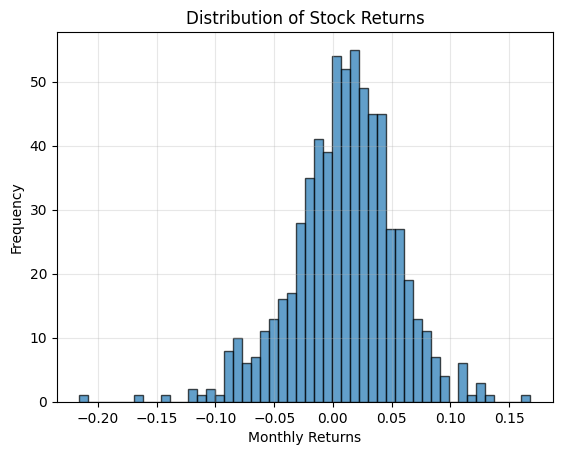

In [49]:
# Question 2.1g: Check normality of returns
# Plot histogram to visualize the distribution of returns
plt.hist(returns, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Stock Returns')
plt.xlabel('Monthly Returns')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Looking at the histogram, skewness and kurtosis, we conclude that **returns are not normally distributed** - they show negative skewness and excess kurtosis (fat tails), indicating higher probability of extreme negative returns than a normal distribution would suggest.

### Question 2.2

We first setup the Sharpe ratio function for the optimization problem. 

In [52]:
# Question 2.2: Portfolio Optimization - Tangency Portfolio
# We'll find the optimal portfolio weights that maximize the Sharpe ratio
# This is called the "tangency portfolio" - the portfolio on the efficient frontier
# that has the highest risk-adjusted return

def Shratio(w, mu, Sigma, Rf): 
    """
    Calculate Sharpe ratio for a given portfolio
    
    Parameters:
    w: portfolio weights (vector)
    mu: expected returns (vector)
    Sigma: covariance matrix
    Rf: risk-free rate
    
    Returns:
    Sharpe ratio: (portfolio return - risk-free rate) / portfolio volatility
    """
    portfolio_return = np.sum(mu * w) - Rf    # Portfolio excess return
    portfolio_vol = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))  # Portfolio volatility
    return portfolio_return / portfolio_vol

We now need to set the risk free rate and select the number of assets in our portfolio.

In [53]:
# Set up the portfolio optimization problem
# We'll optimize a 2-asset portfolio: Stocks and Bonds

Rf = rfrate[len(rfrate)-1]  # Use the most recent risk-free rate
n = 2                       # Number of assets in our portfolio

# Extract returns for Treasury bonds and Treasury bills
tbonds_ret = df.iloc[:,4]   # Treasury bonds (5th column)
tbills_ret = df.iloc[:,6]    # Treasury bills (7th column)

Combine stock, and bond returns in to a matrix, calculate the mean return of all assets, and the covariance.

In [54]:
# Prepare the data for portfolio optimization
# Combine stock and bond returns into a matrix for analysis

ret = np.concatenate((np.expand_dims(returns, 1), np.expand_dims(tbonds_ret, 1)), axis=1)

# Calculate key statistics for portfolio optimization
mu = np.mean(ret, axis=0)      # Mean returns for each asset
Sigma = np.cov(ret, rowvar=False)  # Covariance matrix between assets

Set the initial weights to be equal

In [55]:
# Set initial portfolio weights (equal weights as starting point)
w0 = np.ones((n, 1))/n  # Equal weights: 50% stocks, 50% bonds

Set the constraint condition and solve for the tangency portfolio.

In [56]:
# Solve for the tangency portfolio (maximum Sharpe ratio portfolio)
# Constraint: portfolio weights must sum to 1 (100% allocation)

cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1})  # Weights sum to 1

# Optimize: maximize Sharpe ratio (minimize negative Sharpe ratio)
sol = scp.optimize.minimize(
    lambda w: -Shratio(w, mu, Sigma, Rf),  # Minimize negative Sharpe ratio
    x0=w0.flatten(),                        # Starting point
    constraints=cons                        # Constraint: weights sum to 1
)

# Extract optimal weights and Sharpe ratio
w_uncon = sol.x           # Optimal portfolio weights
val = -sol.fun            # Maximum Sharpe ratio (negate because we minimized negative)

print(f'Optimal weights are {w_uncon} with Sharpe ratio {val:.2f}')

Optimal weights are [nan nan] with Sharpe ratio nan


Calculate the mean and variance of the tangency portfolio, and the weight on the portfolio.

In [57]:
# Calculate portfolio characteristics for the tangency portfolio
# This includes mean return, variance, and optimal allocation with risk-free asset

gam = 5  # Risk aversion coefficient (higher = more risk averse)

# Calculate tangency portfolio statistics
mu_uncon = w_uncon.T.dot(mu)                   # Mean return of tangency portfolio
var_uncon = w_uncon.T.dot(Sigma).dot(w_uncon)   # Variance of tangency portfolio

# Calculate optimal weight in risky portfolio when combining with risk-free asset
# This maximizes mean-variance utility: U = E[R] - (γ/2) × Var[R]
wT_con = (mu_uncon - Rf) / (gam * var_uncon)   # Weight in tangency portfolio

# Calculate final portfolio return (combination of risky and risk-free assets)
rcon = wT_con * mu_uncon + (1 - wT_con) * Rf

# Display results
print(f'The mean of the tangency portfolio is: {mu_uncon:.4f}')
print(f'The variance of the tangency portfolio is: {var_uncon:.4f}')
print(f'The weight on the risky portfolio is: {wT_con:.4f}')
print(f'The return of the final portfolio is: {rcon:.4f}')


The mean of the tangency portfolio is: nan
The variance of the tangency portfolio is: nan
The weight on the risky portfolio is: nan
The return of the final portfolio is: nan


In [ ]:
#### add risk-free asset
gam = 5                                         # gamma: risk aversion coefficient
mu_uncon  = w_uncon.T.dot(mu)                   # mean of tangency portfolio
var_uncon = w_uncon.T.dot(Sigma).dot(w_uncon)   # variance of tangency portfolio
wT_con    = (mu_uncon - Rf) / (gam * var_uncon) # weight to be put in the tangency when maximizing mean variance utility
rcon      = wT_con*mu_uncon + (1-wT_con)*Rf

In [ ]:
print(f'The mean of the tangency portfolio is :{mu_uncon:.2f}')
print(f'The variance of the tangency portfolio is : {var_uncon:.2f}')
print(f'The weight on the risky portfolio is : {wT_con:.2f}')
print(f'The return of the tangency portfolio is : {rcon:.2f}')


### Question 2.3

In [ ]:
# Question 2.3: Stock vs Bond Performance Analysis
# We'll analyze how often stocks underperform bonds over different time horizons

# Calculate the difference between bond and stock returns
delta = tbonds_ret - returns  # Positive when bonds outperform stocks

# Calculate the percentage of time stocks underperform bonds
under = sum(delta > 0) / dim  # Proportion of periods where bonds beat stocks

In [ ]:
print(f'a. Stocks underperform bonds approx. {under*100:.1f}% of the time.')

In [ ]:
# Function to calculate cumulative returns and performance differences
# This function analyzes performance over different investment horizons

def CumReturnsAndDeltas(df, num_months, dim):
    """
    Calculate cumulative returns and performance differences over specified periods
    
    Parameters:
    df: dataframe with financial data
    num_months: investment horizon in months
    dim: total number of observations
    
    Returns:
    ret: array of cumulative returns for different assets
    delta: array of performance differences (bonds - stocks)
    """
    ret = []
    delta = []
    
    # Calculate cumulative returns for each starting point
    for i in range(num_months, dim):
        # Calculate cumulative returns over the specified period
        ret.append(np.array([
            (df.iloc[i,2] / df.iloc[i-num_months,2]) - 1,          # Stocks
            (df.iloc[i,5] / df.iloc[i-num_months,5]) - 1,          # Bonds  
            (df.iloc[i,7] / df.iloc[i-num_months,7]) - 1,          # T-bill
            (df.iloc[i,11] / df.iloc[i-num_months,11]) - 1,        # Bitcoin
            (df.iloc[i,14] / df.iloc[i-num_months,14]) - 1,        # Gold
            (df.iloc[i,9] / df.iloc[i-num_months,9]) - 1           # Inflation
        ]))
        # Calculate performance difference (bonds - stocks)
        delta.append(ret[i-num_months][1] - ret[i-num_months][0])

    ret = np.array(ret)
    delta = np.array(delta)    
    return ret, delta



In [ ]:
# Analyze stock vs bond performance over different time horizons
# This helps understand the "equity risk premium" over various investment periods

# 1-year horizon analysis
ret_cumulative_1yr, delta_1yr = CumReturnsAndDeltas(df, 12, dim)
delt_1yr = sum(delta_1yr > 0) / delta_1yr.shape[0]  # % of time bonds beat stocks

# 5-year horizon analysis  
ret_cumulative_5yr, delta_5yr = CumReturnsAndDeltas(df, 60, dim)
delt_5yr = sum(delta_5yr > 0) / delta_5yr.shape[0]  # % of time bonds beat stocks

# 10-year horizon analysis
ret_cumulative_10yr, delta_10yr = CumReturnsAndDeltas(df, 120, dim)
delt_10 = sum(delta_10yr > 0) / delta_10yr.shape[0]  # % of time bonds beat stocks

In [ ]:
print( f'b.i At the 1 year horizon stocks underperformed bonds {delt_1yr*100:.4}% of the time.')

In [ ]:
print(f'b.ii At the 5 year horizon stocks underperformed bonds {delt_5yr*100:.4}% of the time.')

In [ ]:
print(f'b.iii At the 10 year horizon stocks underperformed bonds {delt_10*100:.4}% of the time.')

## PART 3

# Part 3: Advanced Portfolio Analysis with Multiple Assets
# This section extends the 2-asset portfolio optimization to include 4 assets:
# Stocks, Bonds, Bitcoin, and Gold
# 
# Key concepts:
# - Diversification benefits across different asset classes
# - Risk-return trade-offs in multi-asset portfolios
# - Correlation analysis between assets
# - Comparison with simpler 2-asset portfolios

In [ ]:
# Set up the 4-asset portfolio optimization problem
# Assets: Stocks, Bonds, Bitcoin, Gold

n_assets = 4  # Number of assets in our diversified portfolio
Rf = rfrate[len(rfrate)-1]  # Risk-free rate (same as before)

# Extract returns for all four asset classes
stocks_ret = df.iloc[:,1]    # Stocks (2nd column)
bonds_ret = df.iloc[:,4]     # Bonds (5th column)  
btc_ret = df.iloc[:,11]      # Bitcoin (12th column)
gold_ret = df.iloc[:,14]     # Gold (15th column)

# Combine all returns into a matrix for portfolio analysis
ret_matrix = np.concatenate((
    np.expand_dims(stocks_ret, 1), 
    np.expand_dims(bonds_ret, 1),
    np.expand_dims(btc_ret, 1),
    np.expand_dims(gold_ret, 1)
), axis=1)

# Calculate key statistics for portfolio optimization
mu_multi = np.mean(ret_matrix, axis=0)      # Mean returns for each asset
Sigma_multi = np.cov(ret_matrix, rowvar=False)  # Covariance matrix (4x4)

# Display mean returns for each asset class
print("Mean Monthly Returns for 4-Asset Portfolio:")
print(f"Stocks: {mu_multi[0]*100:.2f}%")
print(f"Bonds: {mu_multi[1]*100:.2f}%") 
print(f"Bitcoin: {mu_multi[2]*100:.2f}%")
print(f"Gold: {mu_multi[3]*100:.2f}%")


In [ ]:
# Optimize the 4-asset portfolio to find the tangency portfolio
# This maximizes the Sharpe ratio by finding optimal weights

# Set initial weights (equal weights as starting point)
w0_multi = np.ones((n_assets, 1))/n_assets  # 25% in each asset initially

# Define constraint: portfolio weights must sum to 1 (100% allocation)
cons_multi = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Solve for the tangency portfolio (maximum Sharpe ratio)
# We minimize the negative Sharpe ratio to maximize the positive Sharpe ratio
sol_multi = scp.optimize.minimize(
    lambda w: -Shratio(w, mu_multi, Sigma_multi, Rf),  # Minimize negative Sharpe ratio
    x0=w0_multi.flatten(),                              # Starting point
    constraints=cons_multi                              # Constraint: weights sum to 1
)

# Extract optimal results
w_multi = sol_multi.x           # Optimal portfolio weights
sharpe_multi = -sol_multi.fun   # Maximum Sharpe ratio

# Display optimal portfolio allocation
print(f'\nOptimal Weights for 4-Asset Tangency Portfolio:')
print(f'Stocks: {w_multi[0]:.3f} ({w_multi[0]*100:.1f}%)')
print(f'Bonds: {w_multi[1]:.3f} ({w_multi[1]*100:.1f}%)')
print(f'Bitcoin: {w_multi[2]:.3f} ({w_multi[2]*100:.1f}%)')
print(f'Gold: {w_multi[3]:.3f} ({w_multi[3]*100:.1f}%)')
print(f'Maximum Sharpe Ratio: {sharpe_multi:.3f}')


In [ ]:
# Calculate detailed portfolio characteristics for the 4-asset tangency portfolio
# This includes risk-return metrics and optimal allocation with risk-free asset

gam = 5  # Risk aversion coefficient (same as 2-asset case)

# Calculate tangency portfolio statistics
mu_portfolio = w_multi.T.dot(mu_multi)                    # Mean return of tangency portfolio
var_portfolio = w_multi.T.dot(Sigma_multi).dot(w_multi)   # Variance of tangency portfolio

# Calculate optimal weight in risky portfolio when combining with risk-free asset
# This maximizes mean-variance utility: U = E[R] - (γ/2) × Var[R]
w_risky = (mu_portfolio - Rf) / (gam * var_portfolio)    # Weight in tangency portfolio

# Calculate final portfolio return (combination of risky and risk-free assets)
portfolio_return = w_risky * mu_portfolio + (1 - w_risky) * Rf

# Display comprehensive portfolio characteristics
print(f'\n4-Asset Tangency Portfolio Characteristics:')
print(f'Mean return: {mu_portfolio:.4f} ({mu_portfolio*100:.2f}%)')
print(f'Variance: {var_portfolio:.4f}')
print(f'Volatility: {np.sqrt(var_portfolio):.4f} ({np.sqrt(var_portfolio)*100:.2f}%)')
print(f'Weight on risky portfolio: {w_risky:.4f} ({w_risky*100:.1f}%)')
print(f'Weight on risk-free asset: {1-w_risky:.4f} ({(1-w_risky)*100:.1f}%)')
print(f'Final portfolio return: {portfolio_return:.4f} ({portfolio_return*100:.2f}%)')

# Compare with 2-asset portfolio to show diversification benefits
print(f'\nComparison with 2-Asset Portfolio:')
print(f'2-asset Sharpe ratio: {val:.3f}')
print(f'4-asset Sharpe ratio: {sharpe_multi:.3f}')
print(f'Improvement from diversification: {sharpe_multi - val:.3f}')
print(f'Percentage improvement: {((sharpe_multi - val)/val)*100:.1f}%')


In [ ]:
# Additional Analysis: Individual Asset Performance and Correlations
# This helps understand why diversification works and which assets contribute most

# Calculate individual asset Sharpe ratios
# Sharpe ratio = (Mean Return - Risk-Free Rate) / Volatility
sharpe_stocks = (mu_multi[0] - Rf) / np.sqrt(Sigma_multi[0,0])
sharpe_bonds = (mu_multi[1] - Rf) / np.sqrt(Sigma_multi[1,1])
sharpe_btc = (mu_multi[2] - Rf) / np.sqrt(Sigma_multi[2,2])
sharpe_gold = (mu_multi[3] - Rf) / np.sqrt(Sigma_multi[3,3])

print('Individual Asset Sharpe Ratios:')
print(f'Stocks: {sharpe_stocks:.3f}')
print(f'Bonds: {sharpe_bonds:.3f}')
print(f'Bitcoin: {sharpe_btc:.3f}')
print(f'Gold: {sharpe_gold:.3f}')

# Calculate correlation matrix to understand diversification benefits
# Lower correlations mean better diversification potential
corr_matrix = np.corrcoef(ret_matrix.T)
print(f'\nCorrelation Matrix (Lower values = Better Diversification):')
print('Assets: Stocks, Bonds, Bitcoin, Gold')
print('        Stocks  Bonds  Bitcoin  Gold')
for i, asset in enumerate(['Stocks', 'Bonds', 'Bitcoin', 'Gold']):
    print(f'{asset:7s} {corr_matrix[i,0]:.3f}  {corr_matrix[i,1]:.3f}   {corr_matrix[i,2]:.3f}   {corr_matrix[i,3]:.3f}')

# Key insights and conclusions
print(f'\nKey Insights:')
print(f'1. Portfolio optimization finds the best risk-return trade-off')
print(f'2. Diversification improves Sharpe ratio by reducing portfolio volatility')
print(f'3. Assets with low correlations provide the best diversification benefits')
print(f'4. The optimal portfolio weights reflect each asset\'s risk-adjusted return potential')
print(f'5. Adding more assets can improve portfolio efficiency, but benefits diminish')
